# Exploratory Data Analysis of Semiconductor Companies

In this project, we will conduct an exploratory data analysis of semiconductor companies. Since 2020, there has been a semiconductor chip shortage due to factors such as the COVID-19 pandemic restricting work, numerous companies needing more chips for their devices, and tensions between countries limiting trade. As a result, semiconductor companies are struggling to meet the growing demand of chips. 

There are 3 different business models that semiconductor companies have adapted:

Pure-Play - only focuses on manufacturing customers' products, and does not release products under their own name

Integrated Device Manufacturer (IDM) - designs and manufactures their own products and others if there are no conflicts of interest

Fabless - only focuses on designing their own products, outsources production to pure-play or IDM companies

We will be analyzing how this shortage has affected the stock price of key semiconductor companies in the US market, and how companies in each of the 3 business models are correlated to one another. 

This project is for practicing financial and data analysis, it should not be taken as financial advice.

# Libraries

We will be using yfinance and pandas to retrieve stock price data

In [1]:
# !pip install yfinance

In [2]:
import numpy as np
from scipy.stats import norm
import pandas as pd
pd.options.mode.chained_assignment = None 
import yfinance as yf
import matplotlib.pyplot as plt
from cycler import cycler
import itertools
import seaborn as sns
from datetime import date

# Functions

Functions for visualization

In [3]:
def plotStock(df, tickers, feature, title):
    fig = plt.figure(figsize =(15, 7))
    for tick in tickers:
        df[feature][tick].plot(label = tick)
        
    plt.title(title)
    plt.legend()
    plt.show()

In [4]:
def plotMA(df, tickers, title):
    fig, axes = plt.subplots(nrows=len(tickers), figsize=(12,15))
    colorDict = {0:'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:purple'}
    ax = 0
    
    for company in tickers:
        MA = pd.DataFrame()
        MA[f'{company} Close'] = df['Adj Close'][company]
        MA[f'{company} 50EMA'] = df['Adj Close'][company].ewm(span
        =50, adjust=False).mean()
        MA[f'{company} 200EMA'] = df['Adj Close'][company].ewm(span
        =200, adjust=False).mean()
        axes[ax].set_title(company)
        axes[ax].set_prop_cycle(cycler('linestyle', ['-', '--', ':', '-.']) +
                                cycler('alpha', [.5, 1, 1, 1]))
        MA.plot(c=colorDict[ax], ax=axes[ax])
        axes[ax].legend()
        ax += 1
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [5]:
def plotReturns(df, title):
    fig, axes = plt.subplots(nrows=len(df.columns), figsize=(15,12), sharex=True)
    colorDict = {0:'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:purple'}
    ax = 0
    for company in df.columns:

        axes[ax].set_title(company)
        df[company].plot(c=colorDict[ax], linestyle='--', marker='.', ax=axes[ax])
        axes[ax].axhline(c='k', alpha=.5)
        ax += 1

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [6]:
def plotReturnsHist(df, title):
    fig, axes = plt.subplots(ncols=len(df.columns), figsize=(15,5))
    colorDict = {0:'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:purple'}
    ax = 0
    for company in df.columns:
        mu = df[company].mean()
        sig = df[company].std()

        axes[ax].set_title(company)
        sns.histplot(df[company], kde=True, bins=60, color=colorDict[ax], ax=axes[ax])
        axes[ax].axvline(mu+sig, color='k', linestyle='--', alpha=0.7)
        axes[ax].axvline(mu-sig, color='k', linestyle='--', alpha=0.7)
        ax += 1

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Pure-Play Semiconductor Companies

Pure-Play companies we will be using: Taiwan Semiconductor Manufacturing Company (TSM),
United Microelectronics Corporation (UMC),
Tower Semiconductor (TSEM)

From 2020 - Present

In [7]:
today = date.today().strftime("%Y-%m-%d")
start = '2020-01-01' 
end = today

ppTickers = ['TSM', 'UMC', 'TSEM']
# [Taiwan - Taiwan Semiconductor Manufacturing Company, Taiwan - United Microelectronics Corporation,
#  Israel - Tower Semiconductor]

pureplay = yf.download(ppTickers, start, end)

[*********************100%***********************]  3 of 3 completed


In [8]:
pureplay.head()

Adj Close                           Close                   \
                 TSEM        TSM       UMC       TSEM        TSM   UMC   
Date                                                                     
2020-01-02  24.610001  57.566662  2.499322  24.610001  60.040001  2.71   
2020-01-03  24.090000  55.668224  2.453209  24.090000  58.060001  2.66   
2020-01-06  23.889999  55.025829  2.425541  23.889999  57.389999  2.63   
2020-01-07  24.160000  55.917515  2.434764  24.160000  58.320000  2.64   
2020-01-08  24.570000  56.329803  2.407096  24.570000  58.750000  2.61   

                 High                         Low                        Open  \
                 TSEM        TSM   UMC       TSEM        TSM   UMC       TSEM   
Date                                                                            
2020-01-02  24.650000  60.119999  2.72  24.200001  59.599998  2.69  24.320000   
2020-01-03  24.299999  58.980000  2.68  23.990000  58.040001  2.65  24.250000   
2020-01-06  23.980000  57.689999  2.64  23.520000  57.130001  2.60  23.889999   
2020-01-07  24.320000  58.599998  2.64  23.730000  56.740002  2.60  23.930000   
2020-01-08  24.799999  58.980000  2.62  24.010000  58.110001  2.59  24.080000   

                             Volume                    
                  TSM   UMC    TSEM       TSM     UMC  
Date                                                   
2020-01-02  59.599998  2.69  383200   8432600  577100  
2020-01-03  58.970001  2.67  369900  10546400  244600  
2020-01-06  57.599998  2.62  423700   8897200  546600  
2020-01-07  57.450001  2.63  176400   7444300  696900  
2020-01-08  58.189999  2.60  485100   5381500  381900

In [9]:
pureplay.describe()

Adj Close                               Close                          \
             TSEM         TSM         UMC        TSEM         TSM         UMC   
count  544.000000  544.000000  544.000000  544.000000  544.000000  544.000000   
mean    26.468585   94.981510    7.058723   26.468585   96.362739    7.213915   
std      6.644291   28.549964    3.513510    6.644291   28.164215    3.477363   
min     13.560000   42.481205    1.964412   13.560000   43.889999    2.130000   
25%     20.534999   65.153824    2.675872   20.534999   66.814999    2.810000   
50%     26.795000  110.125259    8.357251   26.795000  111.035000    8.620000   
75%     29.942501  117.726582   10.001804   29.942501  118.994999   10.167500   
max     47.270000  140.660004   12.540000   47.270000  140.660004   12.540000   

             High                                 Low                          \
             TSEM         TSM         UMC        TSEM         TSM         UMC   
count  544.000000  544.000000  544.000000  544.000000  544.000000  544.000000   
mean    26.867059   97.586268    7.323033   26.051397   95.218217    7.103456   
std      6.711943   28.571046    3.524407    6.579362   27.842757    3.425454   
min     14.370000   45.180000    2.190000   12.130000   42.700001    2.100000   
25%     20.847500   67.177500    2.890000   20.077500   65.682503    2.797500   
50%     27.115001  112.790001    8.790000   26.465000  109.705002    8.445000   
75%     30.300001  120.480001   10.342500   29.442501  117.594997    9.977500   
max     47.500000  145.000000   12.680000   46.919998  139.419998   12.220000   

             Open                                Volume                \
             TSEM         TSM         UMC          TSEM           TSM   
count  544.000000  544.000000  544.000000  5.440000e+02  5.440000e+02   
mean    26.493511   96.504173    7.224724  4.987756e+05  9.857762e+06   
std      6.679742   28.285079    3.481836  9.153816e+05  5.076132e+06   
min     12.950000   43.740002    2.150000  7.500000e+04  3.172100e+06   
25%     20.507500   67.059999    2.827500  2.543750e+05  6.620525e+06   
50%     26.775000  111.000000    8.635000  3.792000e+05  8.562000e+06   
75%     30.020000  119.230001   10.147500  5.310750e+05  1.130900e+07   
max     47.110001  141.610001   12.500000  1.969150e+07  5.202000e+07   

                     
                UMC  
count  5.440000e+02  
mean   5.088727e+06  
std    3.984123e+06  
min    1.812000e+05  
25%    1.455550e+06  
50%    4.676150e+06  
75%    7.391775e+06  
max    2.254410e+07

In [10]:
#dates with highest close price
pureplay['Adj Close'].idxmax()

TSEM   2022-02-16
TSM    2022-01-14
UMC    2021-12-07
dtype: datetime64[ns]

In [11]:
#dates with lowest close price
pureplay['Adj Close'].idxmin()

TSEM   2020-03-16
TSM    2020-03-19
UMC    2020-04-03
dtype: datetime64[ns]

## Price and Moving Averages

TSMC is the clear leader in price as they are the largest Pure-Play semiconductor with big customers such as Apple. TSEM has seen a recent jump in price due to being bought by Intel for $5.4 billion.

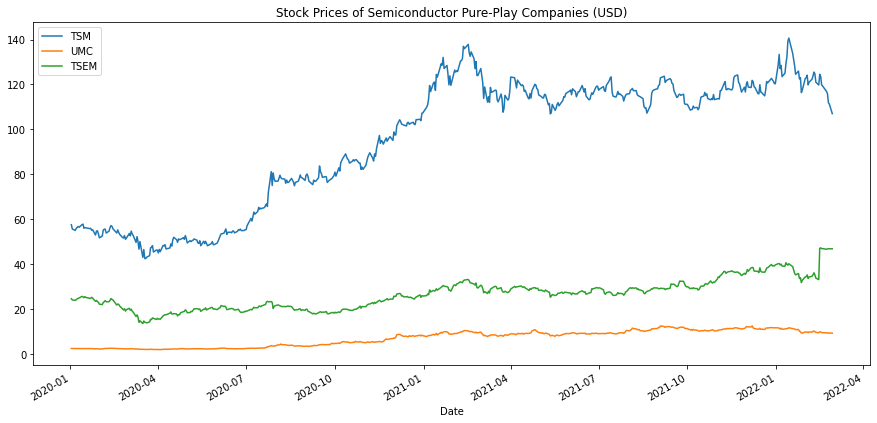

In [12]:
plotStock(pureplay, ppTickers, 'Adj Close', 'Stock Prices of Semiconductor Pure-Play Companies (USD)')

We can see a huge surge in volume traded in January of 2022 by TSMC. Let's take a closer look.

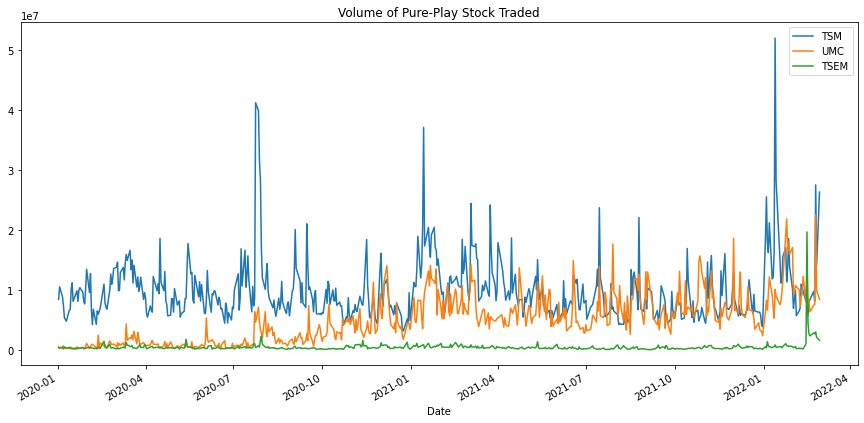

In [13]:
plotStock(pureplay, ppTickers, 'Volume', 'Volume of Pure-Play Stock Traded')

The surge happened on February 13, 2022, and this is due to news that the company is planning to expand greatly to combat the chip shortage.

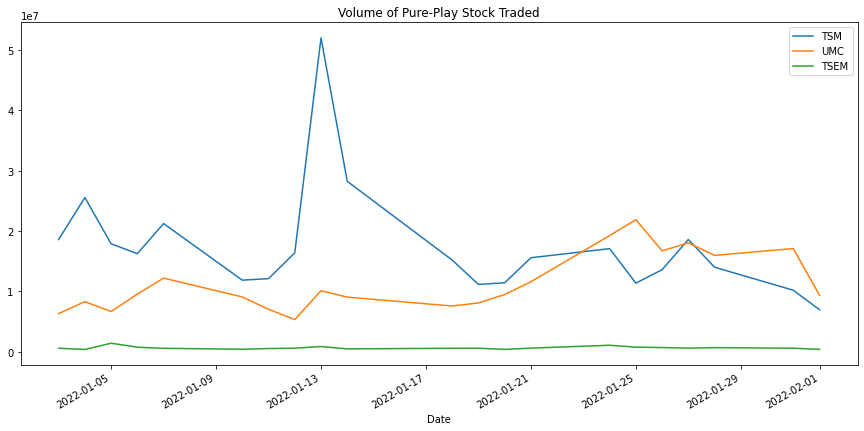

In [14]:
plotStock(pureplay.loc['2022-01-01':'2022-02-01'], ppTickers, 'Volume', 'Volume of Pure-Play Stock Traded')

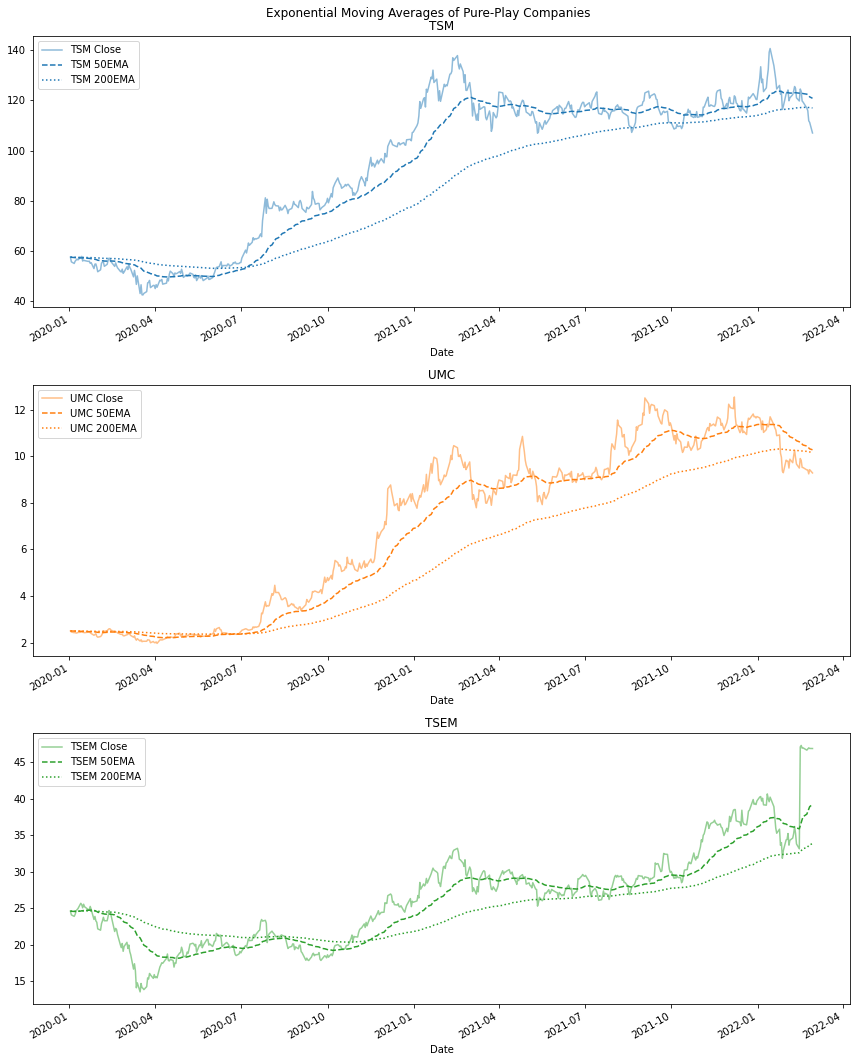

In [15]:
plotMA(pureplay, ppTickers, 'Exponential Moving Averages of Pure-Play Companies')

## Returns

In [16]:
ppReturns = pd.DataFrame()
for company in ppTickers:
    ppReturns[f'{company} Return'] = pureplay['Adj Close'][company].pct_change()
    
ppReturns.head()

,TSM Return,UMC Return,TSEM Return
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.032978,-0.018450,-0.021130
2020-01-06,-0.011540,-0.011278,-0.008302
2020-01-07,0.016205,0.003802,0.011302
2020-01-08,0.007373,-0.011364,0.016970


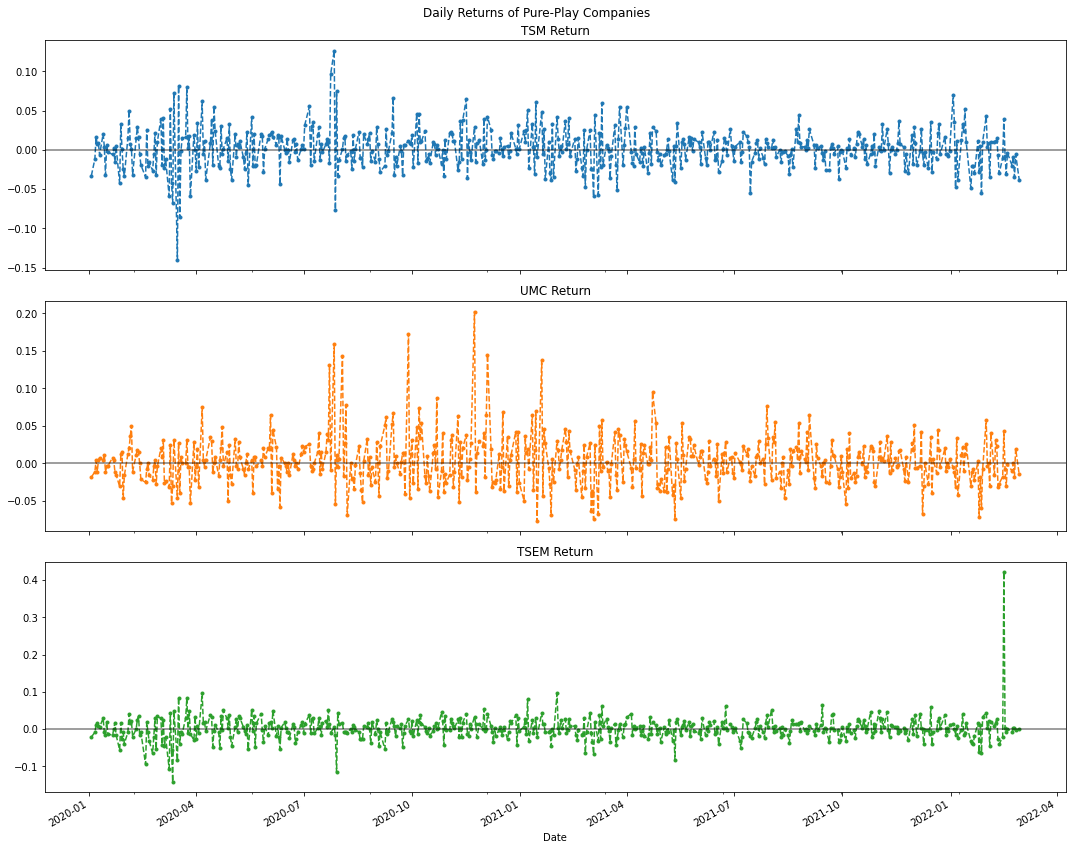

In [17]:
plotReturns(ppReturns, 'Daily Returns of Pure-Play Companies')

In [18]:
#dates with highest returns
ppReturns.idxmax()

TSM Return    2020-07-27
UMC Return    2020-11-23
TSEM Return   2022-02-15
dtype: datetime64[ns]

In [19]:
#dates with lowest returns
ppReturns.idxmin()

TSM Return    2020-03-16
UMC Return    2021-01-15
TSEM Return   2020-03-12
dtype: datetime64[ns]

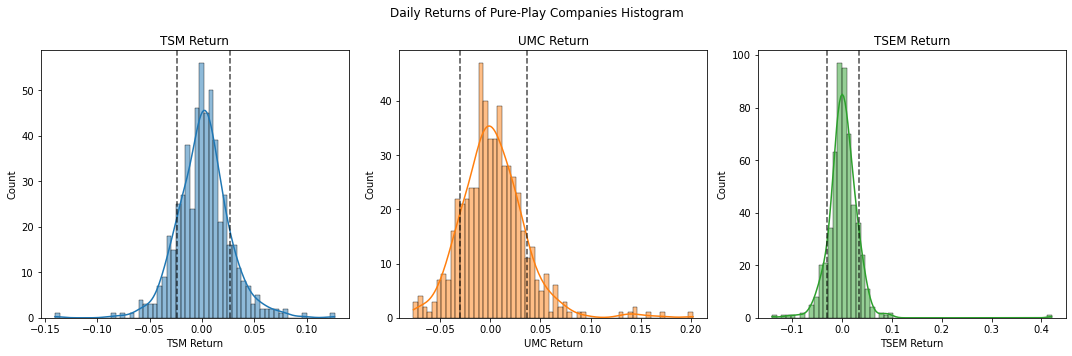

In [20]:
plotReturnsHist(ppReturns, 'Daily Returns of Pure-Play Companies Histogram')

In [21]:
ppReturns.mean()

TSM Return     0.001464
UMC Return     0.002957
TSEM Return    0.001684
dtype: float64

UMC is riskiest with the highest standard deviation

In [22]:
ppReturns.std() 

TSM Return     0.025396
UMC Return     0.033285
TSEM Return    0.032546
dtype: float64

In [23]:
ppReturns.corr()

,TSM Return,UMC Return,TSEM Return
TSM Return,1.000000,0.554287,0.553511
UMC Return,0.554287,1.000000,0.424956
TSEM Return,0.553511,0.424956,1.000000


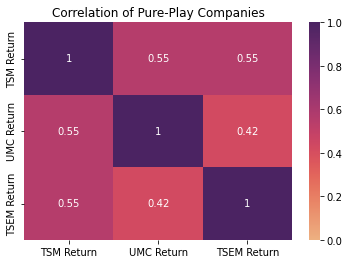

In [62]:
sns.heatmap(ppReturns.corr(), annot=True, vmin=0, cmap='flare')
plt.title('Correlation of Pure-Play Companies')
plt.show()

# IDM Semiconductor Companies

IDM companies we will be using: Intel (INTC),
Micron (MU),
Texas Instruments (TXN)

From 2020 - Present

In [25]:
today = date.today().strftime("%Y-%m-%d")
start = '2020-01-01'
end = today

idmTickers = ['INTC', 'MU', 'TXN']
# [US - Intel, US - Micron, US - Texas Instruments]

idm = yf.download(idmTickers, start, end)

[*********************100%***********************]  3 of 3 completed


In [26]:
idm.head()

Adj Close                             Close             \
                 INTC         MU         TXN       INTC         MU   
Date                                                                 
2020-01-02  57.426067  55.253769  122.164536  60.840000  55.389999   
2020-01-03  56.727589  54.395885  120.542824  60.099998  54.529999   
2020-01-06  56.567131  53.438244  119.703720  59.930000  53.570000   
2020-01-07  55.623245  58.126686  122.013680  58.930000  58.270000   
2020-01-08  55.661003  57.378532  122.343666  58.970001  57.520000   

                             High                               Low  \
                   TXN       INTC         MU         TXN       INTC   
Date                                                                  
2020-01-02  129.570007  60.970001  55.490002  129.610001  60.220001   
2020-01-03  127.849998  60.700001  55.310001  129.250000  59.810001   
2020-01-06  126.959999  60.200001  54.139999  127.330002  59.330002   
2020-01-07  129.410004  59.799999  58.400002  130.899994  58.889999   
2020-01-08  129.759995  59.320000  58.389999  130.570007  58.520000   

                                        Open                           Volume  \
                   MU         TXN       INTC         MU         TXN      INTC   
Date                                                                            
2020-01-02  54.509998  127.769997  60.240002  54.849998  129.130005  18056000   
2020-01-03  54.000000  127.230003  59.810001  54.160000  127.459999  15293900   
2020-01-06  53.160000  125.900002  59.590000  53.750000  127.059998  17755200   
2020-01-07  55.360001  128.419998  59.779999  55.380001  129.149994  21876100   
2020-01-08  57.060001  129.059998  58.889999  58.090000  129.339996  23133500   

                               
                  MU      TXN  
Date                           
2020-01-02  20173200  4614000  
2020-01-03  16815800  4057200  
2020-01-06  18768700  4345400  
2020-01-07  49908200  7184100  
2020-01-08  29730800  3546900

In [28]:
idm.describe()

Adj Close                               Close                          \
             INTC          MU         TXN        INTC          MU         TXN   
count  544.000000  544.000000  544.000000  544.000000  544.000000  544.000000   
mean    53.319789   67.712416  156.303857   55.010423   67.850460  160.289614   
std      5.156242   16.721034   30.907140    5.594482   16.733190   29.622421   
min     42.314144   34.385223   88.792900   44.110001   34.470001   93.500000   
25%     49.139912   50.607726  126.202717   50.384999   50.732501  132.224998   
50%     53.218134   71.139397  166.148033   54.285000   71.264999  169.209999   
75%     56.456484   81.971972  185.476841   59.082501   82.067499  188.177498   
max     66.432579   97.360001  198.741745   68.470001   97.360001  201.289993   

             High                                 Low                          \
             INTC          MU         TXN        INTC          MU         TXN   
count  544.000000  544.000000  544.000000  544.000000  544.000000  544.000000   
mean    55.743327   69.004945  162.042004   54.306140   66.680680  158.385993   
std      5.639076   16.985929   29.492151    5.520018   16.497842   29.613448   
min     44.470001   36.560001  100.370003   43.610001   31.129999   93.089996   
25%     51.017500   51.395001  133.232494   49.730000   49.840000  130.540001   
50%     54.910000   72.029999  171.095001   53.744999   70.310001  165.829994   
75%     59.810001   83.702497  189.390003   58.389999   80.917503  186.522503   
max     69.290001   98.449997  202.259995   67.309998   95.300003  199.059998   

             Open                                Volume                \
             INTC          MU         TXN          INTC            MU   
count  544.000000  544.000000  544.000000  5.440000e+02  5.440000e+02   
mean    55.011820   67.877702  160.261213  3.102962e+07  2.116302e+07   
std      5.606131   16.764546   29.694239  1.663061e+07  8.873891e+06   
min     43.900002   34.259998   95.879997  1.160270e+07  4.848500e+06   
25%     50.360000   50.674999  131.862503  2.086402e+07  1.496015e+07   
50%     54.355000   71.230000  168.325005  2.726420e+07  1.889690e+07   
75%     59.174998   82.294998  188.064999  3.538992e+07  2.433658e+07   
max     68.199997   96.500000  201.550003  1.822699e+08  7.249240e+07   

                     
                TXN  
count  5.440000e+02  
mean   4.864036e+06  
std    2.213430e+06  
min    1.044400e+06  
25%    3.388100e+06  
50%    4.353200e+06  
75%    5.648725e+06  
max    1.641390e+07

In [29]:
#dates of highest price
idm['Adj Close'].idxmax()

INTC   2021-04-09
MU     2022-01-14
TXN    2021-10-21
dtype: datetime64[ns]

## Price and Moving Averages

March 16, 2020 was the day of lowest plunge during stock market crash

In [30]:
#dates of lowest price
idm['Adj Close'].idxmin()

INTC   2020-03-16
MU     2020-03-16
TXN    2020-03-16
dtype: datetime64[ns]

Texas Instruments is the leader in stock price, but Intel has the highest volume. 

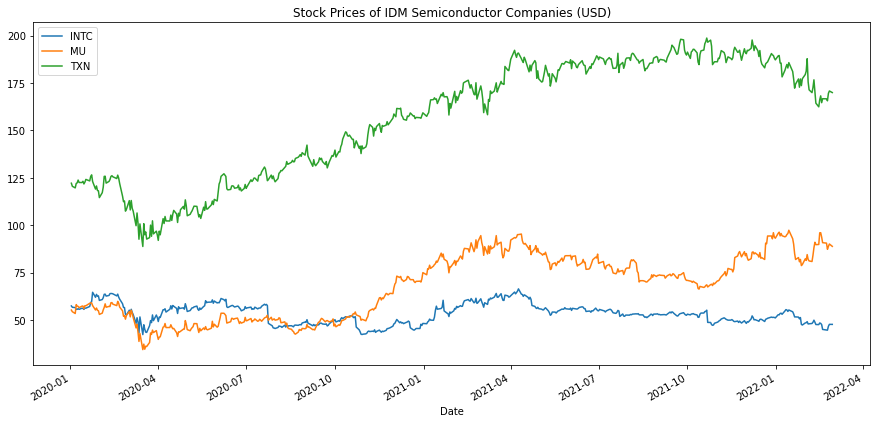

In [31]:
plotStock(idm, idmTickers, 'Adj Close', 'Stock Prices of IDM Semiconductor Companies (USD)')

Let's take a closer look in 2020 when Intel's volume spiked.

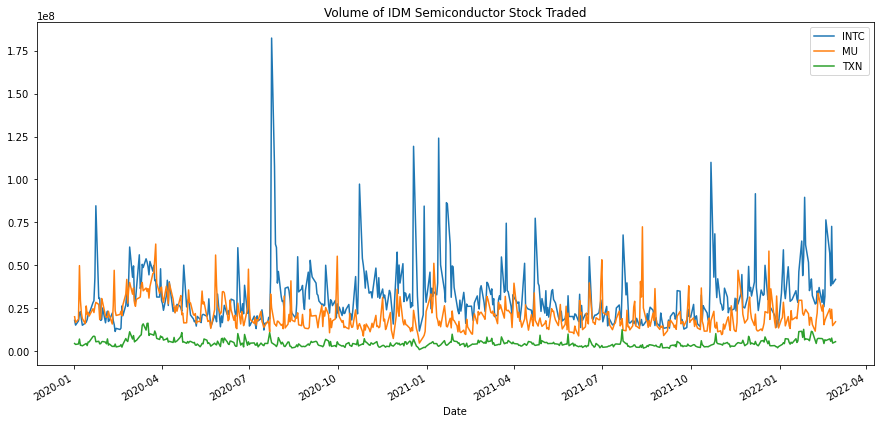

In [32]:
plotStock(idm, idmTickers, 'Volume', 'Volume of IDM Semiconductor Stock Traded')

The high volume traded is due to Intel announcing a delay in making next-generation chips

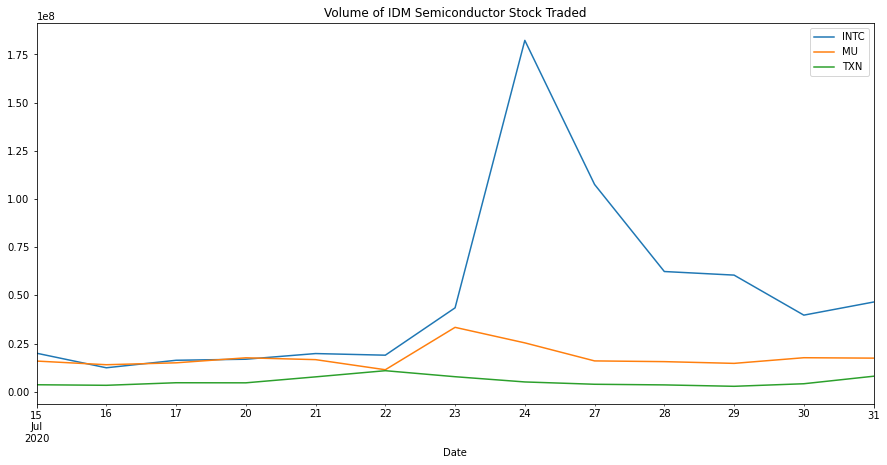

In [68]:
plotStock(idm.loc['2020-07-15':'2020-08-01'], idmTickers, 'Volume', 'Volume of IDM Semiconductor Stock Traded')

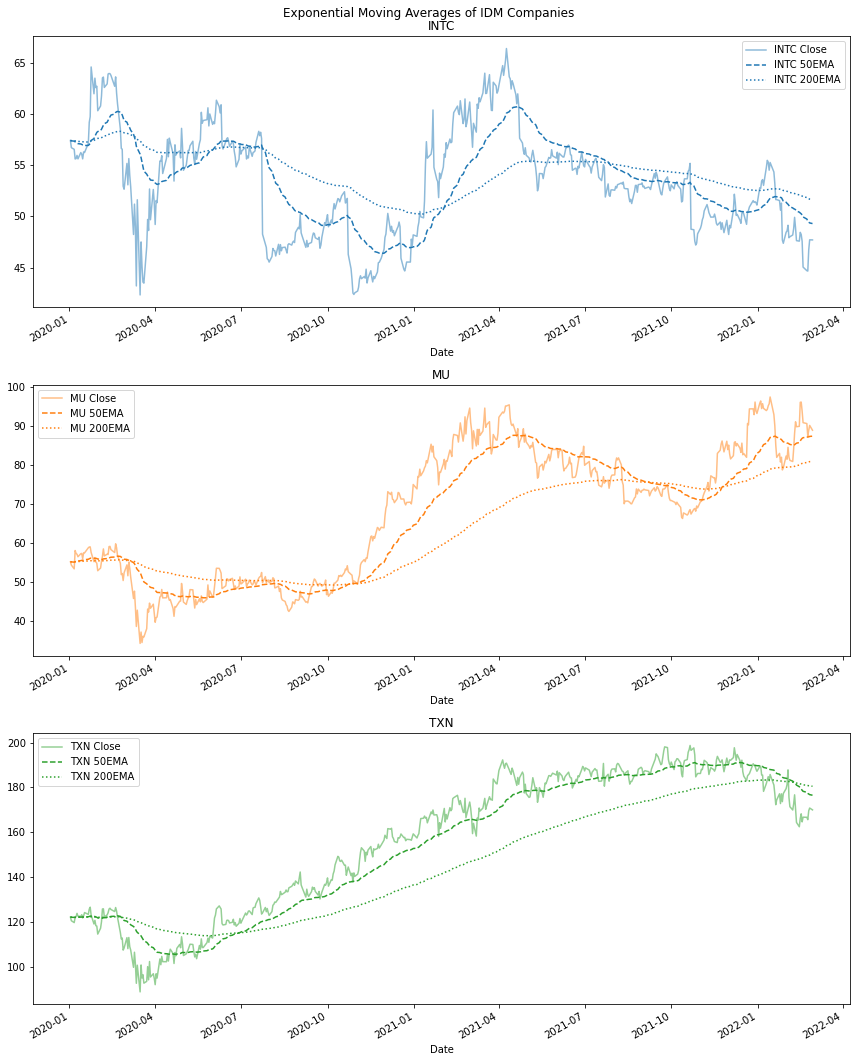

In [69]:
plotMA(idm, idmTickers, 'Exponential Moving Averages of IDM Companies')

## Returns

In [70]:
idmReturns = pd.DataFrame()
for company in idmTickers:
    idmReturns[f'{company} Return'] = idm['Adj Close'][company].pct_change()
    
idmReturns.head()

,INTC Return,MU Return,TXN Return
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.012163,-0.015526,-0.013275
2020-01-06,-0.002829,-0.017605,-0.006961
2020-01-07,-0.016686,0.087736,0.019297
2020-01-08,0.000679,-0.012871,0.002705


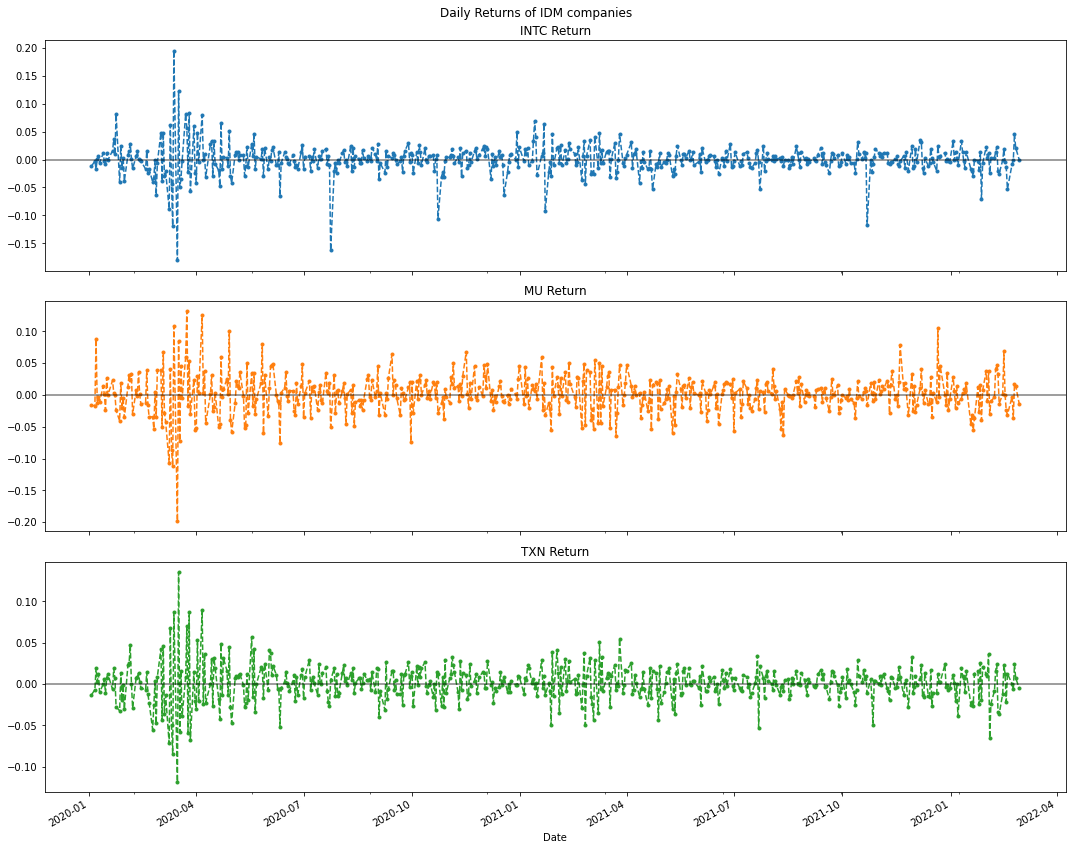

In [71]:
plotReturns(idmReturns, 'Daily Returns of IDM companies')

In [72]:
#dates of highest returns
idmReturns.idxmax()

INTC Return   2020-03-13
MU Return     2020-03-24
TXN Return    2020-03-17
dtype: datetime64[ns]

In [73]:
#dates of lowest returns
idmReturns.idxmin()

INTC Return   2020-03-16
MU Return     2020-03-16
TXN Return    2020-03-16
dtype: datetime64[ns]

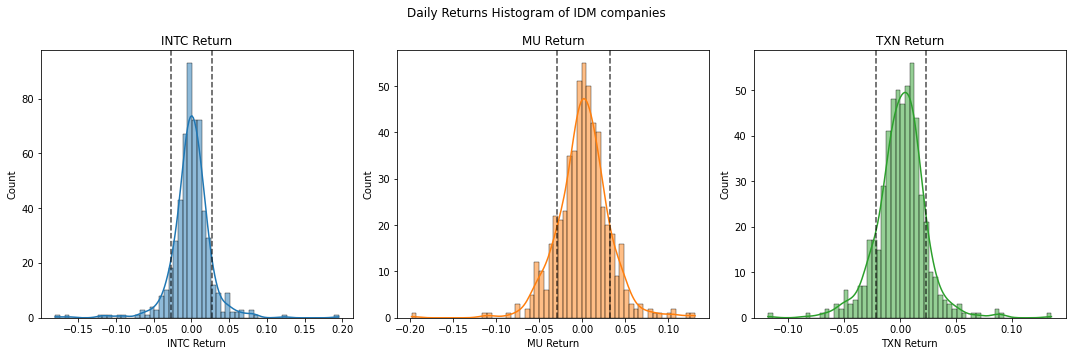

In [74]:
plotReturnsHist(idmReturns, 'Daily Returns Histogram of IDM companies')

In [75]:
idmReturns.mean()

INTC Return    0.000034
MU Return      0.001355
TXN Return     0.000862
dtype: float64

Micron is most volatile with highest standard deviation

In [76]:
idmReturns.std()

INTC Return    0.027248
MU Return      0.030894
TXN Return     0.022555
dtype: float64

In [77]:
idmReturns.corr()

,INTC Return,MU Return,TXN Return
INTC Return,1.000000,0.675313,0.695323
MU Return,0.675313,1.000000,0.744358
TXN Return,0.695323,0.744358,1.000000


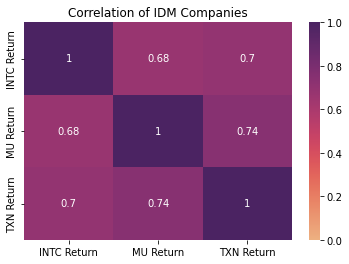

In [79]:
sns.heatmap(idmReturns.corr(), annot=True, vmin=0, cmap='flare')
plt.title('Correlation of IDM Companies')
plt.show()

# Fabless Semiconductor Companies

Fabless companies we will be using: Nvidia (NVDA),
Advanced Micro Devices (AMD),
Qualcomm (QCOM),
Broadcom (AVGO)

From 2020 - Present

In [80]:
today = date.today().strftime("%Y-%m-%d")
start = '2020-01-01'
end = today

fablessTickers = ['NVDA', 'AMD', 'QCOM', 'AVGO']
# [US - NVIDIA, US - AMD, US - Qualcomm, US - Broadcom]

fabless = yf.download(fablessTickers, start, end)

[*********************100%***********************]  4 of 4 completed


In [81]:
fabless.head()

Adj Close                                        Close  \
                  AMD        AVGO       NVDA       QCOM        AMD   
Date                                                                 
2020-01-02  49.099998  299.416290  59.826447  84.910828  49.099998   
2020-01-03  48.599998  291.800629  58.868858  83.311989  48.599998   
2020-01-06  48.389999  291.364105  59.115742  82.823723  48.389999   
2020-01-07  48.250000  290.361115  59.831421  85.178902  48.250000   
2020-01-08  47.830002  286.738953  59.943649  84.929985  47.830002   

                                                   High              ...  \
                  AVGO       NVDA       QCOM        AMD        AVGO  ...   
Date                                                                 ...   
2020-01-02  322.390015  59.977501  88.690002  49.250000  322.500000  ...   
2020-01-03  314.190002  59.017502  87.019997  49.389999  320.000000  ...   
2020-01-06  313.720001  59.264999  86.510002  48.860001  313.920013  ...   
2020-01-07  312.640015  59.982498  88.970001  49.389999  316.579987  ...   
2020-01-08  308.739990  60.095001  88.709999  48.299999  313.489990  ...   

                  Low                  Open                                    \
                 NVDA       QCOM        AMD        AVGO       NVDA       QCOM   
Date                                                                            
2020-01-02  59.180000  88.080002  46.860001  319.320007  59.687500  89.050003   
2020-01-03  58.525002  86.440002  48.029999  317.510010  58.775002  87.260002   
2020-01-06  57.817501  85.540001  48.020000  310.850006  58.080002  85.910004   
2020-01-07  59.097500  86.910004  49.349998  315.250000  59.549999  87.040001   
2020-01-08  59.537498  87.919998  47.849998  312.980011  59.939999  88.900002   

              Volume                              
                 AMD     AVGO      NVDA     QCOM  
Date                                              
2020-01-02  80331100  2032900  23753600  8413900  
2020-01-03  73127400  2287000  20538400  8340300  
2020-01-06  47934900  2078900  26263600  8381400  
2020-01-07  58061400  1856500  31485600  8377400  
2020-01-08  53767000  3197900  27710800  7619900  

[5 rows x 24 columns]

In [82]:
fabless.describe()

Adj Close                                           Close              \
              AMD        AVGO        NVDA        QCOM         AMD        AVGO   
count  544.000000  544.000000  544.000000  544.000000  544.000000  544.000000   
mean    86.213824  409.932647  154.411086  125.523804   86.213824  420.926618   
std     28.242471  113.289817   70.152162   33.209178   28.242471  108.254989   
min     38.709999  155.907471   49.005634   58.778446   38.709999  167.869995   
25%     57.397499  300.904594  102.094437   90.038937   57.397499  318.770004   
50%     83.259998  432.948822  135.368027  131.920082   83.259998  445.170013   
75%    103.654999  478.096909  203.613537  144.725296  103.654999  485.422508   
max    161.910004  674.280029  333.719147  189.279999  161.910004  674.280029   

                                     High              ...         Low  \
             NVDA        QCOM         AMD        AVGO  ...        NVDA   
count  544.000000  544.000000  544.000000  544.000000  ...  544.000000   
mean   154.508208  127.479890   87.937573  426.072757  ...  151.382780   
std     70.104093   32.466117   28.940714  108.857021  ...   68.434819   
min     49.099998   60.910000   41.700001  187.479996  ...   45.169998   
25%    102.244375   92.674997   58.907500  320.939995  ...  100.797503   
50%    135.506256  133.044998   85.040001  450.720001  ...  133.413750   
75%    203.674377  146.982506  105.799999  488.925003  ...  200.885002   
max    333.760010  189.279999  164.460007  677.760010  ...  320.359985   

                         Open                                      \
             QCOM         AMD        AVGO        NVDA        QCOM   
count  544.000000  544.000000  544.000000  544.000000  544.000000   
mean   125.637647   86.240937  420.815882  154.519595  127.495552   
std     32.059768   28.315424  108.194500   70.374914   32.458625   
min     58.000000   39.080002  167.639999   50.025002   61.119999   
25%     91.642498   57.515000  319.132507  103.441877   92.992500   
50%    132.110001   83.400002  447.285004  135.820000  132.899994   
75%    145.485004  102.945000  485.135002  203.684376  147.377506   
max    185.190002  163.279999  677.549988  335.170013  190.300003   

             Volume                                            
                AMD          AVGO          NVDA          QCOM  
count  5.440000e+02  5.440000e+02  5.440000e+02  5.440000e+02  
mean   5.960334e+07  2.207623e+06  4.293791e+07  9.636649e+06  
std    2.893051e+07  1.215525e+06  2.104898e+07  5.006576e+06  
min    1.670590e+07  4.123000e+05  9.788400e+06  2.120200e+06  
25%    4.019552e+07  1.471375e+06  2.688595e+07  6.637100e+06  
50%    5.149895e+07  1.887250e+06  3.740960e+07  8.381550e+06  
75%    7.079918e+07  2.519950e+06  5.455082e+07  1.107555e+07  
max    2.253687e+08  1.086020e+07  1.463684e+08  4.832150e+07  

[8 rows x 24 columns]

In [83]:
fabless['Adj Close'].idxmax()

AMD    2021-11-29
AVGO   2021-12-27
NVDA   2021-11-29
QCOM   2021-12-15
dtype: datetime64[ns]

In [84]:
fabless['Adj Close'].idxmin()

AMD    2020-03-16
AVGO   2020-03-18
NVDA   2020-03-16
QCOM   2020-03-20
dtype: datetime64[ns]

## Price and Moving Averages

Broadcom is the leader in price, while AMD has the largest volume. All companies saw increases around October 2021.

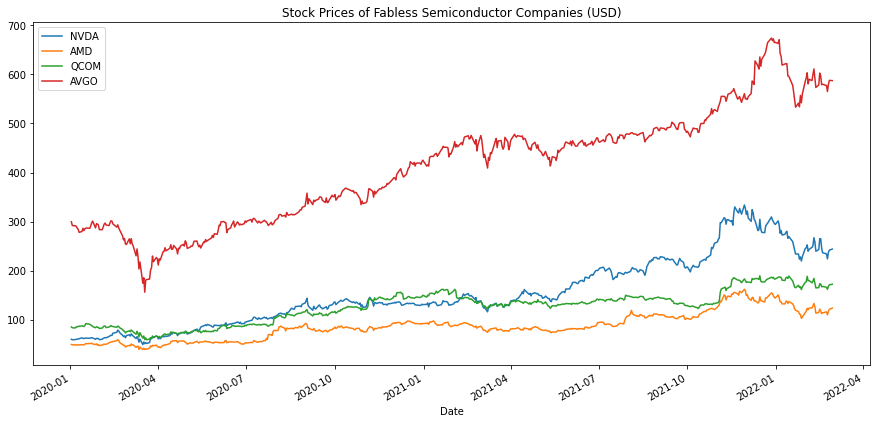

In [47]:
plotStock(fabless, fablessTickers, 'Adj Close', 'Stock Prices of Fabless Semiconductor Companies (USD)')

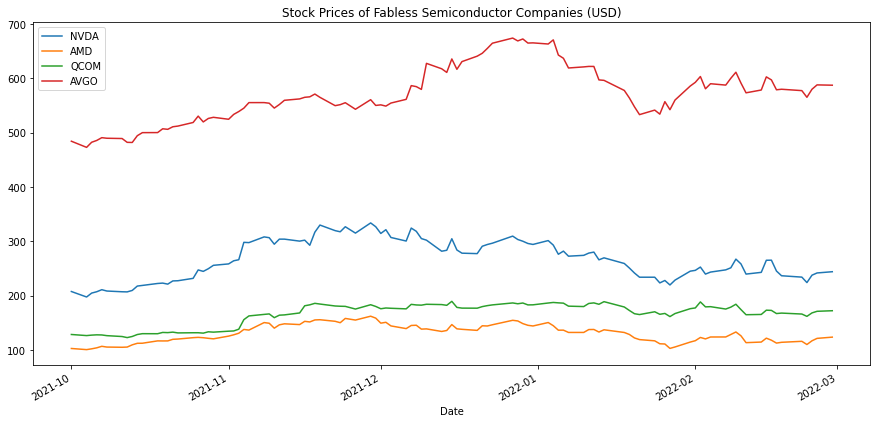

In [85]:
plotStock(fabless.loc['2021-10':today], fablessTickers, 'Adj Close', 'Stock Prices of Fabless Semiconductor Companies (USD)')

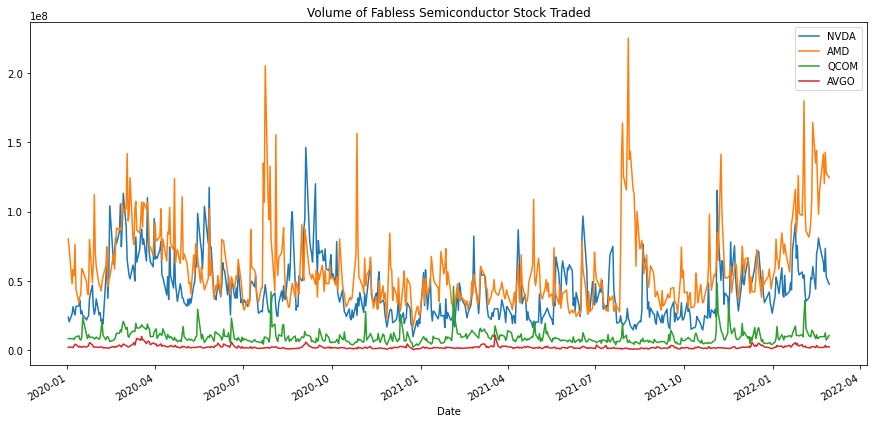

In [86]:
plotStock(fabless, fablessTickers, 'Volume', 'Volume of Fabless Semiconductor Stock Traded')

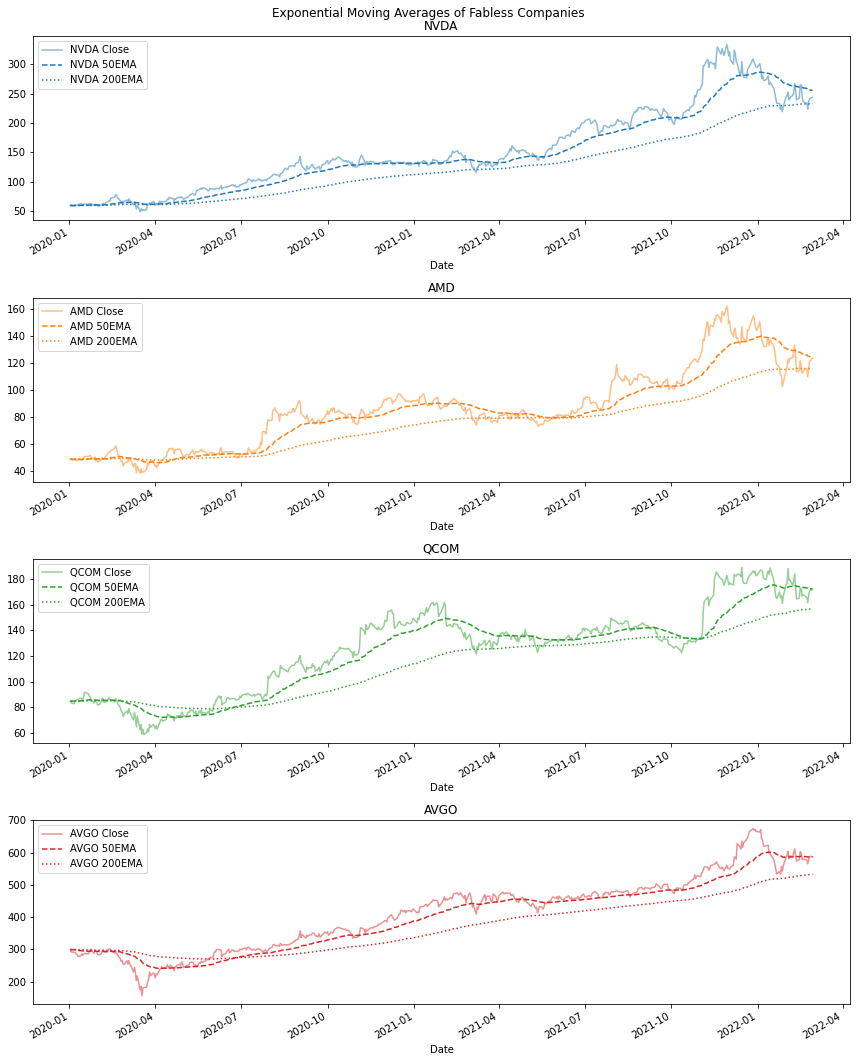

In [87]:
plotMA(fabless, fablessTickers, 'Exponential Moving Averages of Fabless Companies')

## Returns

In [88]:
fablessReturns = pd.DataFrame()
for company in fablessTickers:
    fablessReturns[f'{company} Return'] = fabless['Adj Close'][company].pct_change()
    
fablessReturns.head()

,NVDA Return,AMD Return,QCOM Return,AVGO Return
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.016006,-0.010183,-0.018830,-0.025435
2020-01-06,0.004194,-0.004321,-0.005861,-0.001496
2020-01-07,0.012106,-0.002893,0.028436,-0.003442
2020-01-08,0.001876,-0.008705,-0.002922,-0.012475


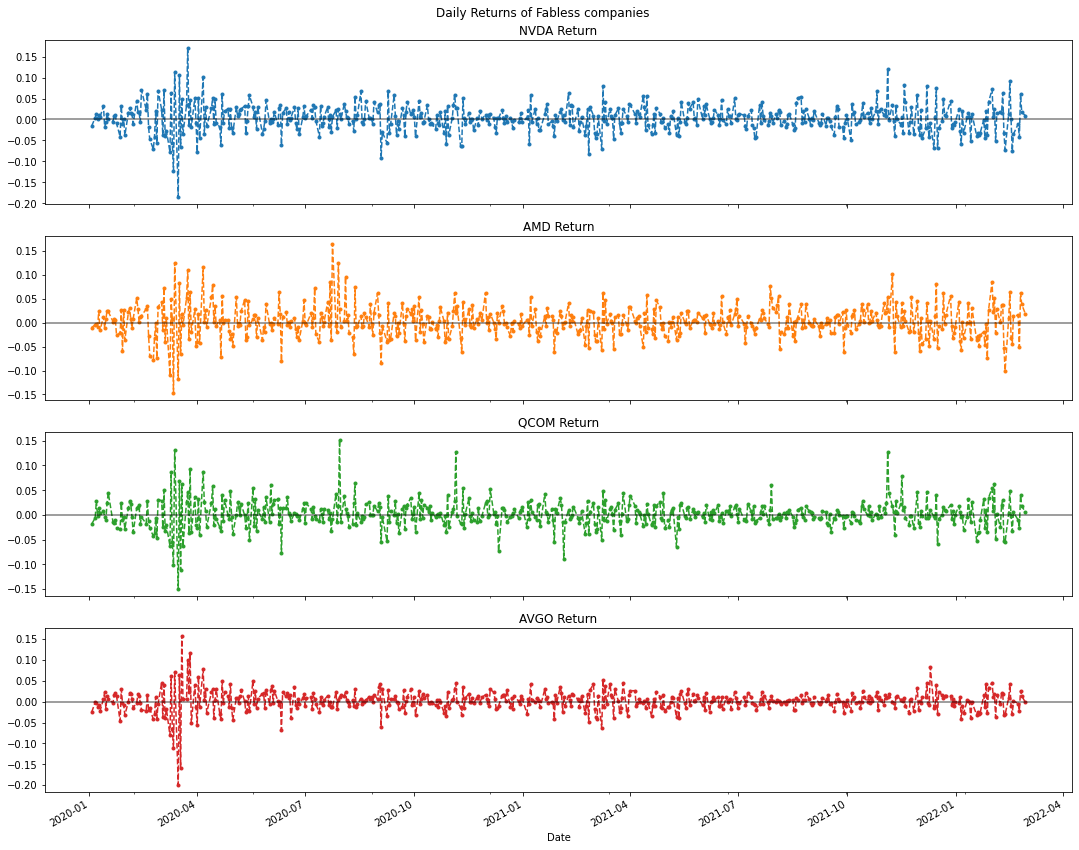

In [89]:
plotReturns(fablessReturns, 'Daily Returns of Fabless companies')

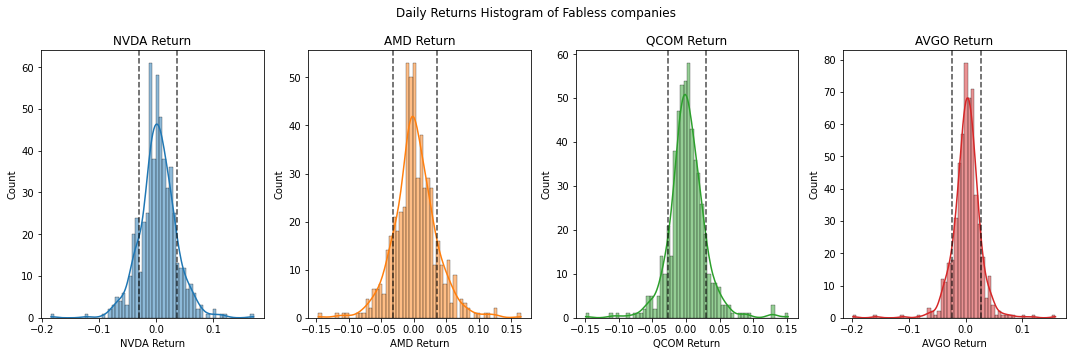

In [90]:
plotReturnsHist(fablessReturns, 'Daily Returns Histogram of Fabless companies')

In [91]:
fablessReturns.mean()

NVDA Return    0.003142
AMD Return     0.002264
QCOM Return    0.001696
AVGO Return    0.001585
dtype: float64

AMD and Nvidia are most risky with the highest standard deviation

In [93]:
fablessReturns.std() 

NVDA Return    0.033215
AMD Return     0.033776
QCOM Return    0.028204
AVGO Return    0.025993
dtype: float64

In [94]:
fablessReturns.corr()

,NVDA Return,AMD Return,QCOM Return,AVGO Return
NVDA Return,1.000000,0.771164,0.692696,0.717115
AMD Return,0.771164,1.000000,0.644761,0.607409
QCOM Return,0.692696,0.644761,1.000000,0.759206
AVGO Return,0.717115,0.607409,0.759206,1.000000


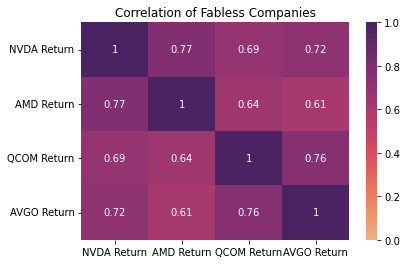

In [96]:
sns.heatmap(fablessReturns.corr(), annot=True, vmin=0, cmap='flare')
plt.title('Correlation of Fabless Companies')
plt.show()

# All Semiconductor Companies

Now we will compare all semiconductor companies used and see how much they correlate.

In [114]:
today = date.today().strftime("%Y-%m-%d")
start = '2020-01-01'
end = today

allTickers = [tick for tick in itertools.chain(ppTickers, idmTickers, fablessTickers)]

semic = yf.download(allTickers, start, end)

[*********************100%***********************]  10 of 10 completed


In [115]:
semic.head()

Adj Close                                                          \
                  AMD        AVGO       INTC         MU       NVDA       QCOM   
Date                                                                            
2020-01-02  49.099998  299.416290  57.426071  55.253773  59.826439  84.910828   
2020-01-03  48.599998  291.800598  56.727589  54.395882  58.868862  83.311974   
2020-01-06  48.389999  291.364075  56.567123  53.438248  59.115730  82.823723   
2020-01-07  48.250000  290.361053  55.623241  58.126690  59.831425  85.178902   
2020-01-08  47.830002  286.738983  55.661003  57.378532  59.943649  84.929970   

                                                        ...    Volume  \
                 TSEM        TSM         TXN       UMC  ...       AMD   
Date                                                    ...             
2020-01-02  24.610001  57.566662  122.164536  2.499322  ...  80331100   
2020-01-03  24.090000  55.668228  120.542824  2.453209  ...  73127400   
2020-01-06  23.889999  55.025826  119.703697  2.425541  ...  47934900   
2020-01-07  24.160000  55.917511  122.013687  2.434764  ...  58061400   
2020-01-08  24.570000  56.329796  122.343674  2.407096  ...  53767000   

                                                                              \
               AVGO      INTC        MU      NVDA     QCOM    TSEM       TSM   
Date                                                                           
2020-01-02  2032900  18056000  20173200  23753600  8413900  383200   8432600   
2020-01-03  2287000  15293900  16815800  20538400  8340300  369900  10546400   
2020-01-06  2078900  17755200  18768700  26263600  8381400  423700   8897200   
2020-01-07  1856500  21876100  49908200  31485600  8377400  176400   7444300   
2020-01-08  3197900  23133500  29730800  27710800  7619900  485100   5381500   

                             
                TXN     UMC  
Date                         
2020-01-02  4614000  577100  
2020-01-03  4057200  244600  
2020-01-06  4345400  546600  
2020-01-07  7184100  696900  
2020-01-08  3546900  381900  

[5 rows x 60 columns]

In [116]:
semic.describe()

Adj Close                                                              \
              AMD        AVGO        INTC          MU        NVDA        QCOM   
count  544.000000  544.000000  544.000000  544.000000  544.000000  544.000000   
mean    86.213824  409.932644   53.319789   67.712416  154.411087  125.523805   
std     28.242471  113.289819    5.156242   16.721034   70.152162   33.209178   
min     38.709999  155.907471   42.314148   34.385223   49.005630   58.778454   
25%     57.397499  300.904594   49.139912   50.607725  102.094444   90.038933   
50%     83.259998  432.948807   53.218134   71.139400  135.368027  131.920082   
75%    103.654999  478.096909   56.456484   81.971972  203.613533  144.725292   
max    161.910004  674.280029   66.432579   97.360001  333.719147  189.279999   

                                                       ...        Volume  \
             TSEM         TSM         TXN         UMC  ...           AMD   
count  544.000000  544.000000  544.000000  544.000000  ...  5.440000e+02   
mean    26.468585   94.981510  156.303856    7.058723  ...  5.960334e+07   
std      6.644291   28.549964   30.907141    3.513510  ...  2.893051e+07   
min     13.560000   42.481201   88.792885    1.964412  ...  1.670590e+07   
25%     20.534999   65.153828  126.202715    2.675872  ...  4.019552e+07   
50%     26.795000  110.125259  166.148033    8.357251  ...  5.149895e+07   
75%     29.942501  117.726582  185.476841   10.001804  ...  7.079918e+07   
max     47.270000  140.660004  198.741745   12.540000  ...  2.253687e+08   

                                                                             \
               AVGO          INTC            MU          NVDA          QCOM   
count  5.440000e+02  5.440000e+02  5.440000e+02  5.440000e+02  5.440000e+02   
mean   2.207623e+06  3.102962e+07  2.116302e+07  4.293791e+07  9.636649e+06   
std    1.215525e+06  1.663061e+07  8.873891e+06  2.104898e+07  5.006576e+06   
min    4.123000e+05  1.160270e+07  4.848500e+06  9.788400e+06  2.120200e+06   
25%    1.471375e+06  2.086402e+07  1.496015e+07  2.688595e+07  6.637100e+06   
50%    1.887250e+06  2.726420e+07  1.889690e+07  3.740960e+07  8.381550e+06   
75%    2.519950e+06  3.538992e+07  2.433658e+07  5.455082e+07  1.107555e+07   
max    1.086020e+07  1.822699e+08  7.249240e+07  1.463684e+08  4.832150e+07   

                                                               
               TSEM           TSM           TXN           UMC  
count  5.440000e+02  5.440000e+02  5.440000e+02  5.440000e+02  
mean   4.987756e+05  9.857762e+06  4.864036e+06  5.088727e+06  
std    9.153816e+05  5.076132e+06  2.213430e+06  3.984123e+06  
min    7.500000e+04  3.172100e+06  1.044400e+06  1.812000e+05  
25%    2.543750e+05  6.620525e+06  3.388100e+06  1.455550e+06  
50%    3.792000e+05  8.562000e+06  4.353200e+06  4.676150e+06  
75%    5.310750e+05  1.130900e+07  5.648725e+06  7.391775e+06  
max    1.969150e+07  5.202000e+07  1.641390e+07  2.254410e+07  

[8 rows x 60 columns]

In [117]:
semic['Adj Close'].idxmax() #dates of highest prices

AMD    2021-11-29
AVGO   2021-12-27
INTC   2021-04-09
MU     2022-01-14
NVDA   2021-11-29
QCOM   2021-12-15
TSEM   2022-02-16
TSM    2022-01-14
TXN    2021-10-21
UMC    2021-12-07
dtype: datetime64[ns]

In [118]:
semic['Adj Close'].idxmin() #dates of lowest prices

AMD    2020-03-16
AVGO   2020-03-18
INTC   2020-03-16
MU     2020-03-16
NVDA   2020-03-16
QCOM   2020-03-20
TSEM   2020-03-16
TSM    2020-03-19
TXN    2020-03-16
UMC    2020-04-03
dtype: datetime64[ns]

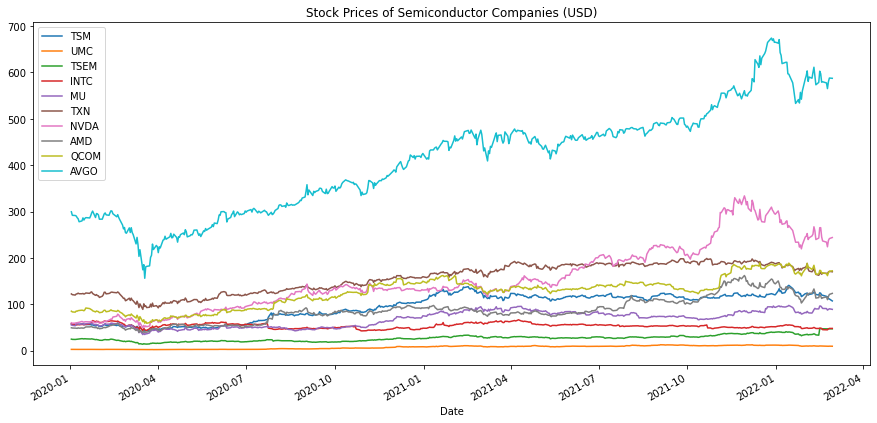

In [132]:
plotStock(semic, allTickers, 'Adj Close', 'Stock Prices of Semiconductor Companies (USD)')

## Returns

In [133]:
allReturns = pd.concat([ppReturns, idmReturns, fablessReturns], axis=1)
allReturns.head()

,TSM Return,UMC Return,TSEM Return,INTC Return,MU Return,TXN Return,NVDA Return,AMD Return,QCOM Return,AVGO Return
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.032978,-0.018450,-0.021130,-0.012163,-0.015526,-0.013275,-0.016006,-0.010183,-0.018830,-0.025435
2020-01-06,-0.011540,-0.011278,-0.008302,-0.002829,-0.017605,-0.006961,0.004194,-0.004321,-0.005861,-0.001496
2020-01-07,0.016205,0.003802,0.011302,-0.016686,0.087736,0.019297,0.012106,-0.002893,0.028436,-0.003442
2020-01-08,0.007373,-0.011364,0.016970,0.000679,-0.012871,0.002705,0.001876,-0.008705,-0.002922,-0.012475


In [134]:
allReturns.mean()

TSM Return     0.001464
UMC Return     0.002957
TSEM Return    0.001684
INTC Return    0.000034
MU Return      0.001355
TXN Return     0.000862
NVDA Return    0.003142
AMD Return     0.002264
QCOM Return    0.001696
AVGO Return    0.001585
dtype: float64

AMD is riskiest with the highest standard deviation

In [135]:
allReturns.std().sort_values(ascending=False) 

AMD Return     0.033776
UMC Return     0.033285
NVDA Return    0.033215
TSEM Return    0.032546
MU Return      0.030894
QCOM Return    0.028204
INTC Return    0.027248
AVGO Return    0.025993
TSM Return     0.025396
TXN Return     0.022555
dtype: float64

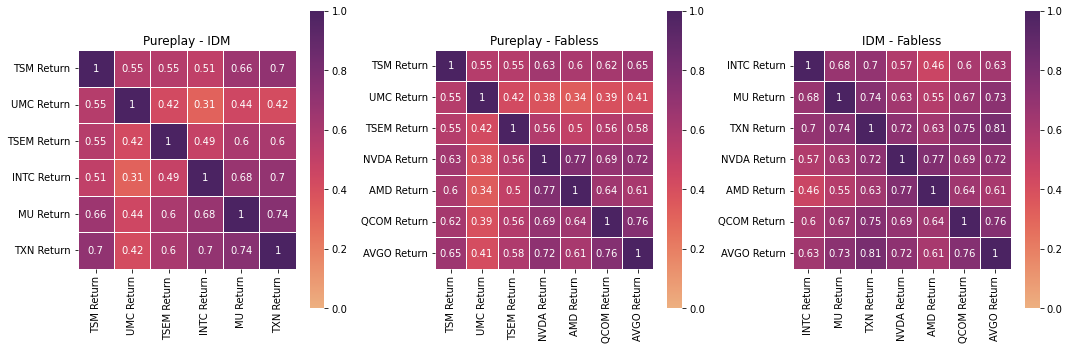

In [107]:
returns1 = pd.concat([ppReturns, idmReturns], axis=1).corr()
returns2 = pd.concat([ppReturns, fablessReturns], axis=1).corr()
returns3 = pd.concat([idmReturns, fablessReturns], axis=1).corr()

fig, axes = plt.subplots(ncols=3, figsize=(15,5))

sns.heatmap(returns1, cmap='flare', square=True, linewidths=.5, vmin=0, annot=True, ax=axes[0])
axes[0].set_title('Pureplay - IDM')
sns.heatmap(returns2, cmap='flare', square=True, linewidths=.5, vmin=0, annot=True, ax=axes[1])
axes[1].set_title('Pureplay - Fabless')
sns.heatmap(returns3, cmap='flare', square=True, linewidths=.5, vmin=0, annot=True, ax=axes[2])
axes[2].set_title('IDM - Fabless')
plt.tight_layout()

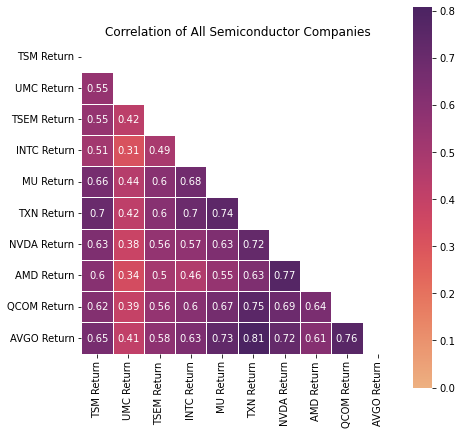

In [112]:
returns = pd.concat([ppReturns, idmReturns, fablessReturns], axis=1).corr()
mask = np.zeros_like(returns)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(7,7))
plt.title('Correlation of All Semiconductor Companies')
sns.heatmap(returns, annot=True, mask=mask, square=True, vmin=0, linewidths=.5, cmap='flare')
plt.show()

UMC shows the least correlation with other companies. This can be because the company is based in Taiwan, and is not as involved in the US market as TSMC. Broadcom and Texas Instruments show the highest correlation.

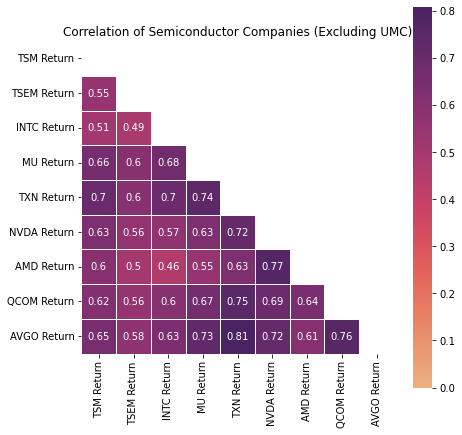

In [136]:
returns = pd.concat([ppReturns, idmReturns, fablessReturns], axis=1).drop(columns='UMC Return').corr()
mask = np.zeros_like(returns)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(7,7))
plt.title('Correlation of Semiconductor Companies (Excluding UMC)')
sns.heatmap(returns, annot=True, mask=mask, square=True, vmin=0, linewidths=.5, cmap='flare')
plt.show()